<a href="https://colab.research.google.com/github/mars241/WebScraping/blob/main/Corrig%C3%A9_Antonio_043_web_scraping_multi_pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

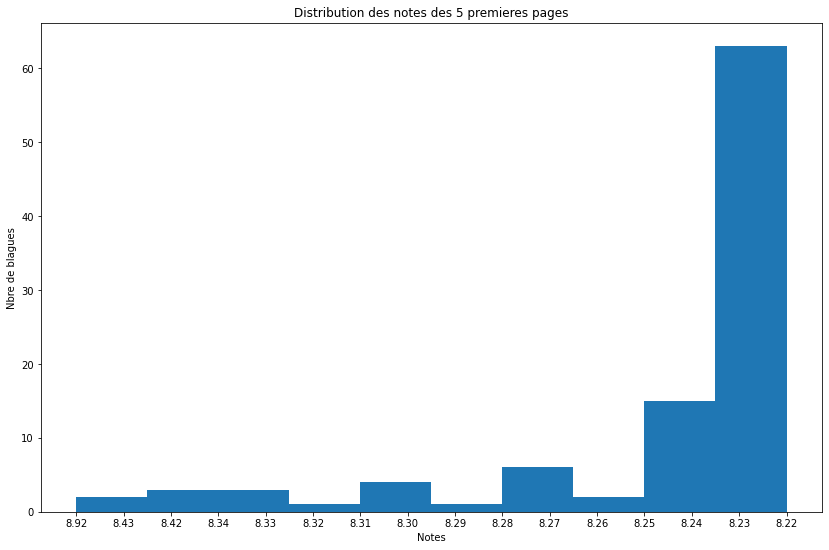


Voici la capture des 5 premieres pages soit 100 blagues :
                                                Blague       Note Notenum
0   Les ennemis des amis de Chuck Norris sont ses ...  (8.92/10)    8.92
1   Un jour Chuck Norris a eu un zero en latin, de...  (8.43/10)    8.43
2   L'avenir se demande parfois ce que Chuck Norri...  (8.42/10)    8.42
3   Chuck Norris ne sait pas à quoi ressemble Nico...  (8.42/10)    8.42
4                                                      (8.42/10)    8.42
..                                                ...        ...     ...
95  Chuck Norris n'a pas de père... On ne nique pa...  (8.22/10)    8.22
96  Si Chuck Norris n'utilise pas l'Oreal, c'est p...  (8.22/10)    8.22
97  Chuck Norris a déjà battu la montre dans une c...  (8.22/10)    8.22
98  Chuck Norris connait la dernière décimale de P...  (8.22/10)    8.22
99  Chuck Norris a fini "Zelda Ocarina of Time" pl...  (8.22/10)    8.22

[100 rows x 3 columns]


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Pour se connecter comme un navigateur et non pas comme Python :
navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'

# Url de la page à scraper :
base_url = "http://www.chucknorrisfacts.fr/facts/top/"
page_nums = [1, 2, 3, 4, 5]

# Initialisation du dictionnaire :
data = []

# Acquisition des données des pages 1 à 5 :
for page_num in page_nums:
    url = base_url + str(page_num)
    response = requests.get(url)
    html = requests.get(url, headers={'User-Agent': navigator})
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver les balises particulières :
    blagues = soup.find_all('p', {'class': 'card-text'})
    notes = soup.find_all('span', {'id': lambda x: x and x.startswith('moyenne_')})

    # Création d'une liste de dictionnaires pour stocker les données scraper :
    for blague, note in zip(blagues, notes):
        data.append({'Blague': blague.get_text(), 'Note': note.get_text()})

# Creation du dataframe des 5 premieres pages :
df = pd.DataFrame(data)
df['Notenum'] = df['Note'].str.slice(1, 5)

# Graphique de distribution des notes :
fig = plt.figure(figsize=(14, 9))
plt.hist(df['Notenum'], bins=10)
plt.xlabel('Notes')
plt.ylabel('Nbre de blagues')
plt.title('Distribution des notes des 5 premieres pages')
plt.show()

# Affichage du dataframe créé :
print("\nVoici la capture des 5 premieres pages soit 100 blagues :\n",df)